### Comparing GARCH conditional volatility to empirical rolling window vol

In [17]:
from arch import arch_model
import pandas as pd
import yfinance
import matplotlib.pyplot as plt

In [79]:
returns = yfinance.download("SPY", start="2010-01-01", end="2021-10-02")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [77]:
pct_return = returns.pct_change().iloc[1:]*100

In [78]:
pct_return

Date
2010-01-04    1.695957
2010-01-05    0.264696
2010-01-06    0.070386
2010-01-07    0.422170
2010-01-08    0.332752
                ...   
2021-09-27   -0.286092
2021-09-28   -2.015185
2021-09-29    0.168314
2021-09-30   -1.222234
2021-10-01    1.188418
Name: Adj Close, Length: 2958, dtype: float64

In [44]:
am = arch_model(pct_return)
res_vanilla = am.fit(disp="off")

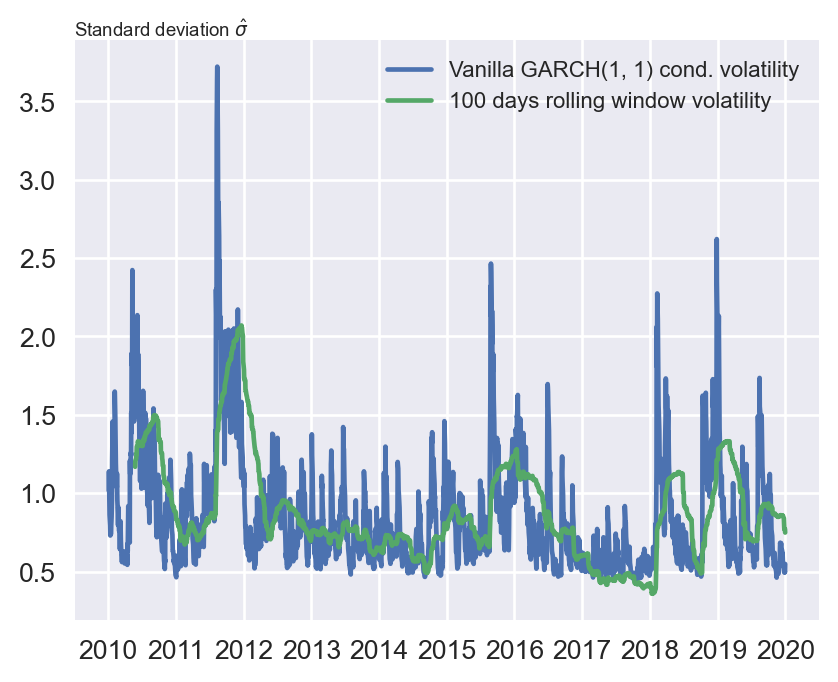

In [70]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=192)
ax.plot(res_vanilla.conditional_volatility, label="Vanilla GARCH(1, 1) cond. volatility")
ax.plot(pct_return.rolling(100).std(), label="100 days rolling window volatility")
ax.set_ylabel('Standard deviation $\hat{\sigma}$', loc='top', rotation = 0, labelpad = -86, size=7) 
ax.legend(fontsize="small")
fig.savefig("../Description of data/GarchvsEmpirical_vol.png", dpi=192)